# ML | Boston Housing Dataset | Linear Regression

##### **Boston Housing Data:** This dataset was taken from the StatLib library and is maintained by Carnegie Mellon University. This dataset concerns the housing prices in the housing city of Boston. The dataset provided has 506 instances with 13 features.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml


In [ ]:
# Load dataset from library
boston_df = fetch_openml(name='boston', version =1)

In [ ]:
# check shape of data
boston_df.data.shape

(506, 13)

In [ ]:
# check columns of dataset
boston_df.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
# create dataframe of dataset, Print first 5 rows
df = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
# Add "PRICE" (target column) to the dataframe
df['PRICE'] = boston_df.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Generate description of dataset
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# get info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# Convert Categorical data to int type
df['RAD'] = df['RAD'].astype(np.float64)
df['CHAS'] = df['CHAS'].astype(np.float64)

In [ ]:
# Get input and output data and split the data into train and test
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Print shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
# Apply Linear regression to the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict the test set results
y_pred = lr.predict(X_test)

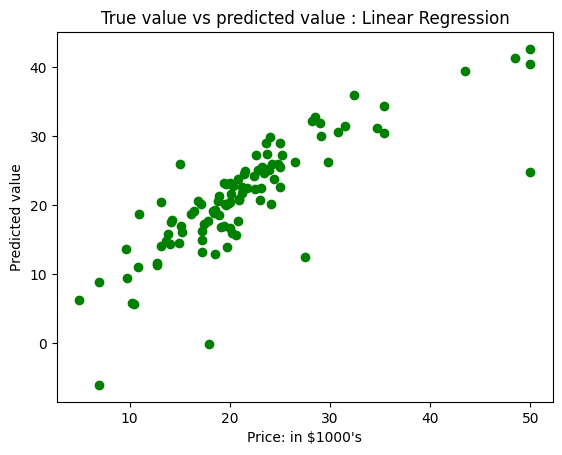

In [ ]:
# Plotting scatter graph to show the prediction betwenn ytest and ypred
plt.scatter(y_test, y_pred,c='green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
# Evalute the model using metrics like accuracy, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Linear Regression Model Evalution Report ")
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))


RMSE:  4.928602182665332
MAE:  3.189091965887837
R2 Score:  0.6687594935356326


In [ ]:
# create a new data point that has 13 features
new_data = np.array([[0.00632,	18.0,	2.31,	0,	0.538,	6.575,	65.2,	4.0900,	1,	296.0,	15.3,	396.90,	4.98]])

# Predict price on new data point
predicted_price = lr.predict(new_data)
print('Predicted Price: ', predicted_price[0])


Predicted Price:  29.95339637733573


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Print first row price value
print(df.iloc[0]['PRICE'])


24.0


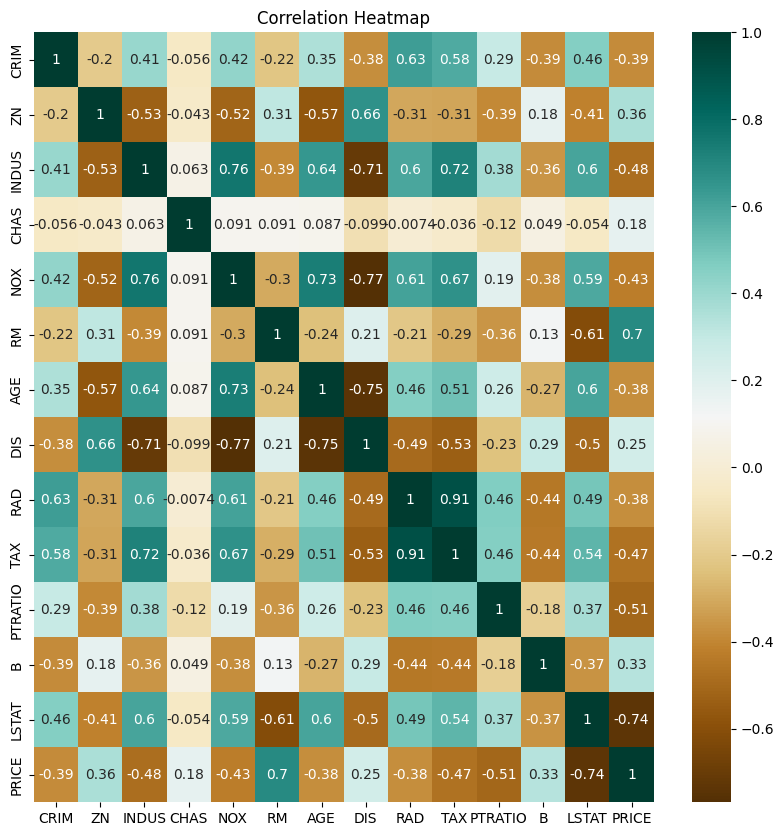

In [ ]:
# plot heatmap to check highly corrrelated variable
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

# create title for heatmap
plt.title('Correlation Heatmap')
plt.show()

##### **RM** have positive correlation with **Price** and **LSTAT** have negative correlation with **PRICE**.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)

In [ ]:
# Split the new poly data into train and test part
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# Predict and evaluate
y_pred_poly = poly_reg.predict(X_test_poly)
# Evaluate with metrics
print("Polynomial Regression Model Evalution Report ")
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('MAE: ', mean_absolute_error(y_test, y_pred_poly))

RMSE:  3.7758890565750285
MAE:  2.5748356263638645


In [ ]:
# print r2 score of the poly model
print('R2 Score: ', r2_score(y_test, y_pred_poly))

R2 Score:  0.8055829448155765


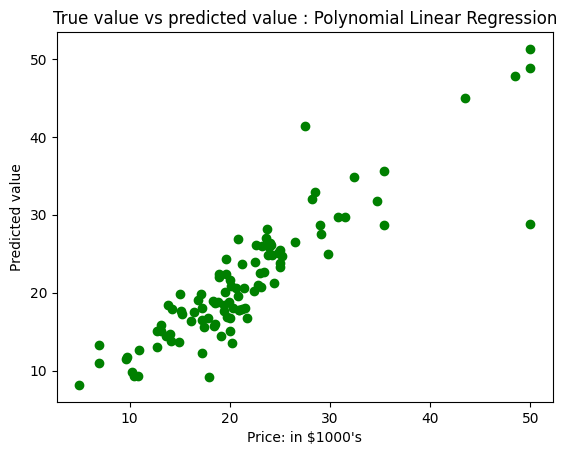

In [ ]:
# Visulaize the Polynomial Linear Regression result
plt.scatter(y_test, y_pred_poly,c='green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Polynomial Linear Regression")
plt.show()

In [ ]:
# create a new data point that has 13 features
new_data_poly = np.array([[0.00632,	18.0,	2.31,	0,	0.538,	6.575,	65.2,	4.0900,	1,	296.0,	15.3,	396.90,	4.98]])
new_data_poly = poly.transform(new_data_poly)
# Predict price on new data point
poly_predicted_price = poly_reg.predict(new_data_poly)
print('Predicted Price: ', poly_predicted_price[0])


Predicted Price:  26.33300977891406


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
# Create dictionary of the metrics
metrics = {
   'Model' : ['Linear Regression','Polynomial Regression'],
   'RMSE' :[np.sqrt(mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_error(y_test, y_pred_poly))],
   'MAE' : [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_poly)],
   'R2 Score' : [r2_score(y_test, y_pred),r2_score(y_test, y_pred_poly)]
 }



In [ ]:
# Create dataframe from the dictionary.
metrics_df = pd.DataFrame(metrics)
#metrics_df.reset_index(drop=True, inplace=True)
metrics_df

,Model,RMSE,MAE,R2 Score
0,Linear Regressio,4.928602,3.189092,0.668759
1,Polynomial Regression,3.775889,2.574836,0.805583


In [ ]:
# import statsmodel api library
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [ ]:
# Add constant term to OLS
result = OLS(y_train, add_constant(X_train)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          6.21e-109
Time:                        10:11:59   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.0

#### **Based on the metrics you provided:**

1. Polynomial Regression has a lower RMSE (3.78 vs 4.93) and MAE (2.57 vs 3.19) compared to Linear Regression. This indicates that the polynomial model's predictions have smaller errors on average.

2. Polynomial Regression has a higher R2 Score (0.81 vs 0.67) compared to Linear Regression. This means the polynomial model explains a larger proportion of the variance in housing prices.
Conclusion:


## Conclusion

**Polynomial Regression** is the best suitable model for this dataset as it demonstrates better performance across all evaluation metrics (lower RMSE, lower MAE, and higher R2 Score) when compared to the standard Linear Regression model.